In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify


In [2]:
#Using pandas read_csv() function
df = pd.read_csv(r"C:\Users\Owner\Desktop\Mangimind Data Science Bootcamp\Machine Learning Project 1\recom.csv")
df

,Unnamed: 0,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey
0,0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0
1,1,9006f9ac,45c7d853,2022-09-17 15:54:57.187,19.0,35012.0,1.0,NaN
2,2,32270891,61ad76dd,2022-11-28 13:51:55.667,141.0,5005.0,1.0,5005.0
3,3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,NaN
4,4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,NaN
...,...,...,...,...,...,...,...,...
49995,49995,bb127ffb,4e0eb5ab,2022-09-24 21:48:20.847,111.5,45004.0,4.0,45004.0
49996,49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,NaN
49997,49997,c983862a,d1a35c5c,2022-11-24 20:02:43.023,178.0,5001.5,1.0,5001.5
49998,49998,8821da12,66f9b474,2022-11-06 13:07:01.423,26.0,49291.5,1.0,NaN


In [3]:
#looking at all columns in the dataframe
df.columns.tolist()

['Unnamed: 0',
 'Main_ID',
 'Transaction_ID',
 'Date',
 'Price',
 'Code_Product',
 'Amount',
 'ItemKey']

In [4]:
# Dropped 'Unnamed: 0' 
df = df.drop(columns =['Unnamed: 0'])

In [5]:
# The info() method prints information about the DataFrame. 
# The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). 
df.info()

# Using the isnull() with sum() to look at the number of null values in the dataframe.
df.isnull().sum()

# Using isnull() with mean() function to get the percentage of missing data in itemKey, which is 42.81%
df.isnull().mean()

# Filling NaN values in ItemKey as 0 because dropping all the NaN values would result in losing a large sameple of data.
df = df.fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Main_ID         50000 non-null  object 
 1   Transaction_ID  50000 non-null  object 
 2   Date            50000 non-null  object 
 3   Price           50000 non-null  float64
 4   Code_Product    50000 non-null  float64
 5   Amount          50000 non-null  float64
 6   ItemKey         28597 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.7+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Code_Product'] = df['Code_Product'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Main_ID         50000 non-null  object        
 1   Transaction_ID  50000 non-null  object        
 2   Date            50000 non-null  datetime64[ns]
 3   Price           50000 non-null  float64       
 4   Code_Product    50000 non-null  object        
 5   Amount          50000 non-null  float64       
 6   ItemKey         50000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.7+ MB


In [8]:
df['ItemKey'] = df['Code_Product']
df

,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey
0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0
1,9006f9ac,45c7d853,2022-09-17 15:54:57.187,19.0,35012.0,1.0,35012.0
2,32270891,61ad76dd,2022-11-28 13:51:55.667,141.0,5005.0,1.0,5005.0
3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,35078.5
4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,49291.5
...,...,...,...,...,...,...,...
49995,bb127ffb,4e0eb5ab,2022-09-24 21:48:20.847,111.5,45004.0,4.0,45004.0
49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,49292.0
49997,c983862a,d1a35c5c,2022-11-24 20:02:43.023,178.0,5001.5,1.0,5001.5
49998,8821da12,66f9b474,2022-11-06 13:07:01.423,26.0,49291.5,1.0,49291.5


In [9]:
df['Main_ID'].duplicated(keep= False).value_counts()

True     28729
False    21271
Name: Main_ID, dtype: int64

In [10]:
df['Transaction_ID'].duplicated(keep= False).value_counts()

False    46859
True      3141
Name: Transaction_ID, dtype: int64

In [11]:
from datetime import datetime
dates_list = df['Date'].tolist()
df.sort_values(by='Date',ascending=True)


,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey
16726,fd791c5f,b74dd1cc,2022-08-26 00:00:14.643,238.0,49567.5,1.0,49567.5
18537,1283bee8,5c4f8c08,2022-08-26 07:32:34.807,483.0,10023.0,1.0,10023.0
20151,92113dd4,87a673d9,2022-08-26 08:55:12.440,6.5,200019.5,1.0,200019.5
34420,bedecec3,f1081001,2022-08-26 10:41:07.863,29.0,5011.5,1.0,5011.5
31311,b663568c,cde97e07,2022-08-26 10:50:50.303,41.0,49567.5,1.0,49567.5
...,...,...,...,...,...,...,...
7094,387aecb7,1c626600,2022-12-03 01:03:27.093,83.5,10015.0,1.0,10015.0
23089,a70f5f11,d002ccbf,2022-12-03 01:31:43.163,118.5,5009.0,1.0,5009.0
25141,a70f5f11,1098d6b0,2022-12-03 01:32:58.090,101.5,10013.0,1.0,10013.0
14064,80851dc3,50eae523,2022-12-03 01:50:42.637,24.5,49292.0,1.0,49292.0


RFM modelling is a marketing analysis technique used to evaluate a customer's value. The RFM model is based on three factors:

    Recency: How recently a customer has made a purchase
    Frequency: How often a customer makes a purchase
    Monetary Value: How much money a customer spends on purchases

The “RFM” in RFM analysis stands for recency, frequency and monetary value. 
RFM analysis is a way to use data based on existing customer behavior to predict how a new customer is likely to act in the future. 


An RFM model is built using three key factors: how recently a customer has transacted with a brand.

Calculating the monetary value. We need to do is calculate the total amount spent by each customer.
We need to use the columns Price and Amount. We will multiply these values first, to get the total amount spent by each customer for each transaction.

In [12]:
df['Total'] = df['Amount']*df['Price']
df

,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey,Total
0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0,125.0
1,9006f9ac,45c7d853,2022-09-17 15:54:57.187,19.0,35012.0,1.0,35012.0,19.0
2,32270891,61ad76dd,2022-11-28 13:51:55.667,141.0,5005.0,1.0,5005.0,141.0
3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,35078.5,4.5
4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,49291.5,647.5
...,...,...,...,...,...,...,...,...
49995,bb127ffb,4e0eb5ab,2022-09-24 21:48:20.847,111.5,45004.0,4.0,45004.0,446.0
49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,49292.0,34.0
49997,c983862a,d1a35c5c,2022-11-24 20:02:43.023,178.0,5001.5,1.0,5001.5,178.0
49998,8821da12,66f9b474,2022-11-06 13:07:01.423,26.0,49291.5,1.0,49291.5,26.0


In [13]:
# To get the total amount spent by the same customer throughout the entire dataset.
# We use the groupby() function on 'Main_ID' and sum() function on 'Total'  

monetary_value = df.groupby('Main_ID')['Total'].sum()
monetary_value = pd.DataFrame(monetary_value).reset_index()
monetary_value


,Main_ID,Total
0,00024de6,12.0
1,00084856,46.0
2,0008e848,13.0
3,00096930,96.0
4,000c66b7,62.0
...,...,...
28509,fff8b1c4,4.0
28510,fff905d0,24.0
28511,fff9726b,75.0
28512,fffa332b,58.0


In [14]:
# Calculating the frequency requires finding the number of times each customer has made a purchase.
# Again we are using the groupby() function on 'Main_ID' and count() function on the 'Date' field 
# to determine the unique dates each customer was making a purchase.
# This gives us a quantitative measure of frequency of purchases for each customer in the data frame.

freq_purchases = df.groupby('Main_ID')['Date'].count()
freq_purchases = pd.DataFrame(freq_purchases).reset_index()
freq_purchases



,Main_ID,Date
0,00024de6,1
1,00084856,2
2,0008e848,1
3,00096930,1
4,000c66b7,2
...,...,...
28509,fff8b1c4,1
28510,fff905d0,1
28511,fff9726b,2
28512,fffa332b,1


Now we need to calculate the recency of purchase, we need to find the last time the person was making a purchase. Was it a year ago? Months ago? Or a few days back?

To find this value, we need to use the Main_ID and Date column. We first need to find the latest date each customer was seen making a purchase. Then, we need to assign some quantitative value to this date.

For example, if customer A was seen making a purchase two months ago and customer B was seen making a purchase two years ago, we need to assign a higher recency value to customer A. Therefore the higher the recency value the more recent the purchase based on the dates provided.

In [15]:
# Next we need to assign a rank to all the dates for each CustomerID. 
# The most recent date will be ranked as 1, second most recent date as 2, and so on.
# rank() function of Pandas is used to rank the data in different ways, after sorting (by default in ascending order), 
# the position is used to determine the rank that is returned. If data contains equal values, then they are assigned with the average of the ranks of each value by default.
df['rank'] = df.sort_values(['Main_ID','Date']).groupby(['Main_ID'])['Date'].rank(method='min').astype(int)
df

,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey,Total,rank
0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0,125.0,1
1,9006f9ac,45c7d853,2022-09-17 15:54:57.187,19.0,35012.0,1.0,35012.0,19.0,4
2,32270891,61ad76dd,2022-11-28 13:51:55.667,141.0,5005.0,1.0,5005.0,141.0,8
3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,35078.5,4.5,1
4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,49291.5,647.5,1
...,...,...,...,...,...,...,...,...,...
49995,bb127ffb,4e0eb5ab,2022-09-24 21:48:20.847,111.5,45004.0,4.0,45004.0,446.0,2
49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,49292.0,34.0,1
49997,c983862a,d1a35c5c,2022-11-24 20:02:43.023,178.0,5001.5,1.0,5001.5,178.0,16
49998,8821da12,66f9b474,2022-11-06 13:07:01.423,26.0,49291.5,1.0,49291.5,26.0,1


In [16]:
# We want to filter the data frame and get rid of all the other purchases. 
# We only need to keep the most recent ones, which are rank 1s
recent_purchases = df[df['rank']==1]
recent_purchases
#recent_purchases = df

,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey,Total,rank
0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0,125.0,1
3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,35078.5,4.5,1
4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,49291.5,647.5,1
6,4cced191,87c4b548,2022-10-15 17:00:39.867,6.0,5012.0,1.0,5012.0,6.0,1
7,d93c0430,4e39a356,2022-10-21 10:50:28.717,33.5,49292.0,1.0,49292.0,33.5,1
...,...,...,...,...,...,...,...,...,...
49986,50fef10a,38ce109f,2022-10-18 15:29:38.197,40.5,45004.0,1.0,45004.0,40.5,1
49987,db8a4949,a48c43ce,2022-11-06 21:40:54.343,18.5,49291.5,1.0,49291.5,18.5,1
49988,2316a392,c17bbc22,2022-11-02 18:08:09.760,50.5,49291.5,2.0,49291.5,101.0,1
49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,49292.0,34.0,1


In [17]:
recent_purchases.columns.tolist()

['Main_ID',
 'Transaction_ID',
 'Date',
 'Price',
 'Code_Product',
 'Amount',
 'ItemKey',
 'Total',
 'rank']

In [18]:
# Calculate a quantitative recency value. 
# This means that a person seen one day ago will be given a higher recency value as compared to someone seen one week ago.
# We need to calculate the difference between every date in the data frame from the earliest date. This way, more recent dates will have a higher value.
recent_purchases['recent_purchases'] = recent_purchases['Date'] - pd.to_datetime('2022-08-26')
recent_purchases

C:\Users\Owner\AppData\Local\Temp\ipykernel_10604\3609239111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_purchases['recent_purchases'] = recent_purchases['Date'] - pd.to_datetime('2022-08-26')


,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey,Total,rank,recent_purchases
0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0,125.0,1,42 days 20:53:49.153000
3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,35078.5,4.5,1,17 days 16:20:22.110000
4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,49291.5,647.5,1,49 days 18:53:43.933000
6,4cced191,87c4b548,2022-10-15 17:00:39.867,6.0,5012.0,1.0,5012.0,6.0,1,50 days 17:00:39.867000
7,d93c0430,4e39a356,2022-10-21 10:50:28.717,33.5,49292.0,1.0,49292.0,33.5,1,56 days 10:50:28.717000
...,...,...,...,...,...,...,...,...,...,...
49986,50fef10a,38ce109f,2022-10-18 15:29:38.197,40.5,45004.0,1.0,45004.0,40.5,1,53 days 15:29:38.197000
49987,db8a4949,a48c43ce,2022-11-06 21:40:54.343,18.5,49291.5,1.0,49291.5,18.5,1,72 days 21:40:54.343000
49988,2316a392,c17bbc22,2022-11-02 18:08:09.760,50.5,49291.5,2.0,49291.5,101.0,1,68 days 18:08:09.760000
49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,49292.0,34.0,1,84 days 19:49:01.973000


In [19]:
# convert the recency values into numeric.
def recency(recent_purchases):
    res = str(recent_purchases).split(' ')[0]
    return(int(res))
    
recent_purchases['recent_purchases'] = recent_purchases['recent_purchases'].apply(recency)
recent_purchases

C:\Users\Owner\AppData\Local\Temp\ipykernel_10604\2289234483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_purchases['recent_purchases'] = recent_purchases['recent_purchases'].apply(recency)


,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey,Total,rank,recent_purchases
0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0,125.0,1,42
3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,35078.5,4.5,1,17
4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,49291.5,647.5,1,49
6,4cced191,87c4b548,2022-10-15 17:00:39.867,6.0,5012.0,1.0,5012.0,6.0,1,50
7,d93c0430,4e39a356,2022-10-21 10:50:28.717,33.5,49292.0,1.0,49292.0,33.5,1,56
...,...,...,...,...,...,...,...,...,...,...
49986,50fef10a,38ce109f,2022-10-18 15:29:38.197,40.5,45004.0,1.0,45004.0,40.5,1,53
49987,db8a4949,a48c43ce,2022-11-06 21:40:54.343,18.5,49291.5,1.0,49291.5,18.5,1,72
49988,2316a392,c17bbc22,2022-11-02 18:08:09.760,50.5,49291.5,2.0,49291.5,101.0,1,68
49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,49292.0,34.0,1,84


In [20]:
# The data frame above has many duplicate values for each CustomerID. 
# This is because the breakdown is by product, and the same customers purchased multiple products at the same time.
recent_purchases = recent_purchases[['Main_ID','recent_purchases']].sort_values(by=['Main_ID','recent_purchases'])
recent_purchases = recent_purchases.drop_duplicates()
recent_purchases

,Main_ID,recent_purchases
31628,00024de6,8
37021,00084856,56
18346,0008e848,18
3927,00096930,91
17661,000c66b7,11
...,...,...
9081,fff8b1c4,67
39799,fff905d0,52
38966,fff9726b,28
35259,fffa332b,30


In [21]:
# Finished calculating RFM values. We have the results stored in separate data frames, so let's merge them together:
rfm_df = freq_purchases.merge(monetary_value,on='Main_ID').merge(recent_purchases,on='Main_ID')
rfm_df


,Main_ID,Date,Total,recent_purchases
0,00024de6,1,12.0,8
1,00084856,2,46.0,56
2,0008e848,1,13.0,18
3,00096930,1,96.0,91
4,000c66b7,2,62.0,11
...,...,...,...,...
28509,fff8b1c4,1,4.0,67
28510,fff905d0,1,24.0,52
28511,fff9726b,2,75.0,28
28512,fffa332b,1,58.0,30


In [22]:
rfm_df.describe()

,Date,Total,recent_purchases
count,28514.000000,28514.000000,28514.000000
mean,1.753525,156.452900,51.082416
std,2.306502,740.707513,27.970359
min,1.000000,0.500000,0.000000
25%,1.000000,29.000000,29.000000
50%,1.000000,53.000000,52.000000
75%,2.000000,106.000000,75.000000
max,51.000000,52634.500000,99.000000


In [23]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Text(0.5, 1.0, 'Scatterplot Between Total Spending and Recent Purchases')

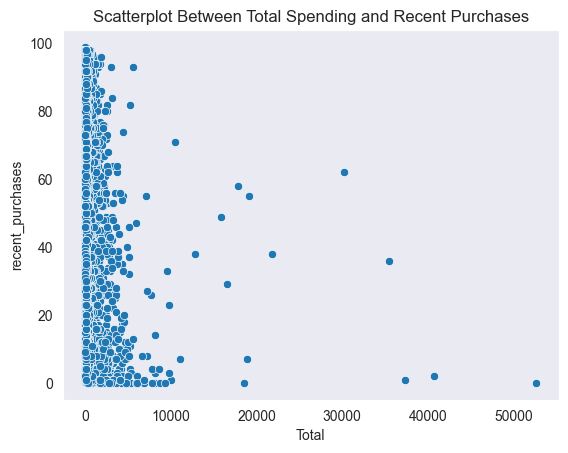

In [24]:
sns.set_style('dark')
sns.scatterplot(x = 'Total', y = 'recent_purchases', data = rfm_df)
plt.xlabel('Total')
plt.ylabel('recent_purchases')
plt.title('Scatterplot Between Total Spending and Recent Purchases')


Feature Normalization

Feature normalization helps to adjust all the data elements to a common scale in order to improve the performance of the clustering algorithm. Since the data in these variables are of different scales, it is tough to compare these variables. Each data point is converted to the range of 0 to +1. Normalization techniques include Min-max, decimal scaling and z-score. The MinMaxScaler normalization technique was used to normalize the features before running the k-Means algorithm on the dataset.

In [25]:
# We are only interested in the Total and recent_purchases. 
# So let’s extract these columns from our dataset using the .loc() function.
Total_recent = rfm_df.loc[:,['Total','recent_purchases']].values
Total_recent

array([[12. ,  8. ],
       [46. , 56. ],
       [13. , 18. ],
       ...,
       [75. , 28. ],
       [58. , 30. ],
       [42.5, 67. ]])

In [26]:
scaler = MinMaxScaler().fit(Total_recent) #It makes an object of the MinMaxScaler and then we fit it on our variable Total_recent. 
print(scaler)
MinMaxScaler()
# The output shows that it is an object of MinMaxScaler.
# And we have just fitted the our MinMaxScaler on our Total_recent variable. 
# Note that we have not applied the transformation yet.

scaler.feature_range
(0, 1)
# The range is between 0 and 1. 
# When we apply the transform function all the Total and recent_purchases
# all the values will lie between 0 and 1. No value will be less than 0 and greater than 1.

scaler.transform(Total_recent) 


MinMaxScaler()


array([[2.18489949e-04, 8.08080808e-02],
       [8.64460235e-04, 5.65656566e-01],
       [2.37489076e-04, 1.81818182e-01],
       ...,
       [1.41543489e-03, 2.82828283e-01],
       [1.09244975e-03, 3.03030303e-01],
       [7.97963294e-04, 6.76767677e-01]])

In [27]:
# To find the optimum number of clusters we’d used the WCSS (Within Clusters Sum of Squares)
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(Total_recent) #Finds the Kmeans to our data
    wcss.append(kmeans.inertia_) #This gives us the wcss values for each clusters
wcss

[15665896470.068356,
 6954592806.0009365,
 3614068162.5008483,
 2068724601.534443,
 1369189900.3301437,
 954119534.1553228,
 725542765.4828774,
 503347257.1680523,
 388041948.00598496,
 320166784.97013766]

A dendrogram is a graph that keeps the values of the points on the x-axis, then connects all the points as they are clustered. This is similar to the elbow curve, as it gives us a better idea of the ideal amount of clusters we want to use. After making a dendrogram, you'll know how many clusters to make based on how refined you want them to be.

In [28]:
import plotly.figure_factory as ff

In [29]:

# fig = ff.create_dendrogram(#data, color_threshold=0)
# fig.update_layout(width=800, height=500)
# fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

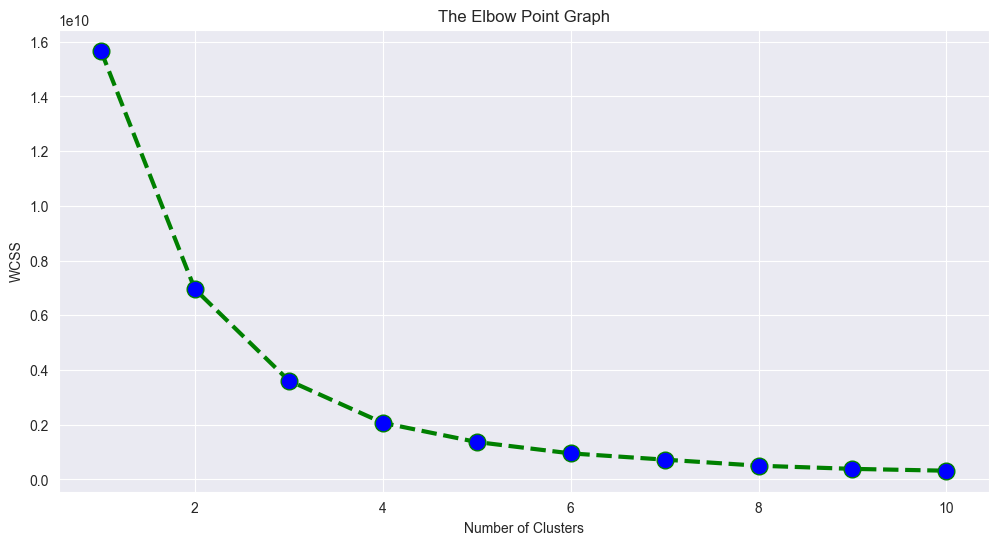

In [30]:
# The elbow graph is used in determining the number of clusters in a data set.
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

# From the below graph we can observe that between number of cluster = 2 to number of cluster = 4
# there has been substantial decrease(an elbow) hence, we chose the K value for our dataset as 3.

In [31]:
# train the model on the dataset with a number of clusters 3.
kmeans= KMeans(n_clusters = 4, init = 'k-means++') #initialize the class object
label= kmeans.fit_predict(Total_recent) #returns a cluster number for each of the data points
print(label)

[0 0 0 ... 0 0 0]


In [32]:
# This generate the X and Y centroid coordinates of all the cluster that have been created.
print(kmeans.cluster_centers_)

[[9.78630982e+01 5.15804063e+01]
 [1.08382167e+04 1.87333333e+01]
 [3.93012000e+04 2.02000000e+01]
 [2.30976775e+03 2.65182342e+01]]


Clustering is a type of unsupervised learning that groups data points together. This group of data points is called a cluster.

One of the most popular ways to cluster is by using the K-means algorithm.
K-means is an unsupervised learning algorithm used to identify and solve clustering issues.

K represents how many clusters there will be. These clusters are then determined by the means of all the points that will belong to the cluster.

The K-means algorithm groups the data into K clusters, where belonging to a cluster is based on some similarity or distance measure to a centroid.
A centroid is a data point that is the arithmetic mean position of all the points on a cluster
The centroid is found by taking the mean of all the x values in a cluster, and the mean of all the y values in a cluster.
When working with data that has a set number of clusters. Often, you won't know the number that you should work with, so you'll have to use the trial-and-error method to determine it. 

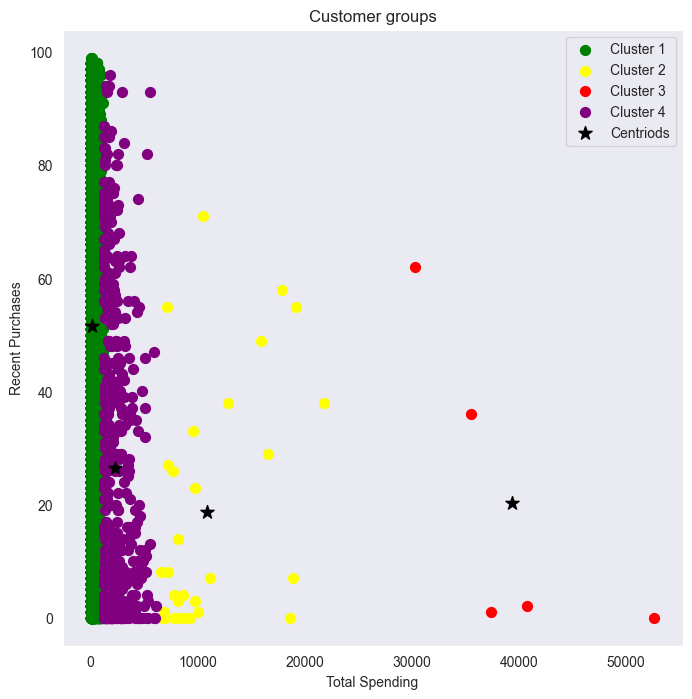

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(Total_recent[label == 0,0], Total_recent[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(Total_recent[label == 1,0], Total_recent[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(Total_recent[label == 2,0], Total_recent[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(Total_recent[label == 3,0], Total_recent[label== 3,1], s=50, c='purple', label='Cluster 4')
#plt.scatter(Total_recent[label == 4,0], Total_recent[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Total Spending')
plt.ylabel('Recent Purchases')
plt.legend()
plt.show()  

In [34]:
# Creating a Pivot Table using pd.pivot_table() function. 
# The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

pivot_table = pd.pivot_table(df, index =['Main_ID'], 
                             columns= ['Code_Product'],
                             values = ['Amount'], 
                             aggfunc=pd.Series.sum, fill_value=0)
display(pivot_table)


Amount                                                          \
Code_Product 10000.5 10001.0 10001.5 10002.0 10003.0 10003.5 10004.0 10006.0   
Main_ID                                                                        
00024de6           0       0       0       0       0       0       0       0   
00084856           0       0       0       0       0       0       0       0   
0008e848           0       0       0       0       0       0       0       0   
00096930           0       0       0       0       0       0       0       0   
000c66b7           0       0       0       0       0       0       0       0   
...              ...     ...     ...     ...     ...     ...     ...     ...   
fff8b1c4           0       0       0       0       0       0       0       0   
fff905d0           0       0       0       0       0       0       0       0   
fff9726b           0       0       0       0       0       0       0       0   
fffa332b           0       0       0       0       0       0       0       0   
ffff4aa9           0       0       0       0       0       0       0       0   

                              ...                                          \
Code_Product 10013.0 10015.0  ... 57035.5 60020.5 60047.5 60048.0 60048.5   
Main_ID                       ...                                           
00024de6           0       0  ...       0       0       0       0       0   
00084856           0       0  ...       0       0       0       0       0   
0008e848           0       0  ...       0       0       0       0       0   
00096930           0       0  ...       0       0       0       0       0   
000c66b7           0       0  ...       0       0       0       0       0   
...              ...     ...  ...     ...     ...     ...     ...     ...   
fff8b1c4           0       0  ...       0       0       0       0       0   
fff905d0           0       0  ...       0       0       0       0       0   
fff9726b           0       0  ...       0       0       0       0       0   
fffa332b           0       0  ...       0       0       0       0       0   
ffff4aa9           0       0  ...       0       0       0       0       0   

                                                      
Code_Product 60049.0 60049.5 60050.5 60051.0 60052.0  
Main_ID                                               
00024de6           0       0       0       0       0  
00084856           0       0       0       0       0  
0008e848           0       0       0       0       0  
00096930           0       0       0       0       0  
000c66b7           0       0       0       0       0  
...              ...     ...     ...     ...     ...  
fff8b1c4           0       0       0       0       0  
fff905d0           0       0       0       0       0  
fff9726b           0       0       0       0       0  
fffa332b           0       0       0       0       0  
ffff4aa9           0       0       0       0       0  

[28514 rows x 333 columns]

In [35]:
df

,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey,Total,rank
0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0,125.0,1
1,9006f9ac,45c7d853,2022-09-17 15:54:57.187,19.0,35012.0,1.0,35012.0,19.0,4
2,32270891,61ad76dd,2022-11-28 13:51:55.667,141.0,5005.0,1.0,5005.0,141.0,8
3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,35078.5,4.5,1
4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,49291.5,647.5,1
...,...,...,...,...,...,...,...,...,...
49995,bb127ffb,4e0eb5ab,2022-09-24 21:48:20.847,111.5,45004.0,4.0,45004.0,446.0,2
49996,a8bc484a,c9946c16,2022-11-18 19:49:01.973,34.0,49292.0,1.0,49292.0,34.0,1
49997,c983862a,d1a35c5c,2022-11-24 20:02:43.023,178.0,5001.5,1.0,5001.5,178.0,16
49998,8821da12,66f9b474,2022-11-06 13:07:01.423,26.0,49291.5,1.0,49291.5,26.0,1


In [36]:
# pivot_table_customer_product = pd.pivot_table(df, index =['Main_ID'],
#                              columns= ['Code_Product'],
#                              values = ['Amount'], 
#                              aggfunc=pd.Series.sum, fill_value=0)
# display(pivot_table_customer_product)


In [37]:
product_corr = pivot_table.corr()
product_corr

Amount                                          \
Code_Product          10000.5   10001.0   10001.5   10002.0   10003.0   
       Code_Product                                                     
Amount 10000.5       1.000000  0.057320 -0.000619  0.013508  0.008359   
       10001.0       0.057320  1.000000 -0.000317 -0.000429  0.030526   
       10001.5      -0.000619 -0.000317  1.000000 -0.000237 -0.001305   
       10002.0       0.013508 -0.000429 -0.000237  1.000000  0.011151   
       10003.0       0.008359  0.030526 -0.001305  0.011151  1.000000   
...                       ...       ...       ...       ...       ...   
       60049.0      -0.000831 -0.000425 -0.000235 -0.000318 -0.001751   
       60049.5      -0.000371 -0.000190 -0.000105 -0.000142 -0.000783   
       60050.5      -0.000691 -0.000354 -0.000196 -0.000265 -0.001457   
       60051.0      -0.000277 -0.000142 -0.000078 -0.000106 -0.000584   
       60052.0      -0.000525 -0.000269 -0.000149 -0.000201 -0.001107   

                                                                       ...  \
Code_Product          10003.5   10004.0   10006.0   10013.0   10015.0  ...   
       Code_Product                                                    ...   
Amount 10000.5      -0.001973  0.045708 -0.000373  0.018305  0.032635  ...   
       10001.0      -0.001010  0.013546 -0.000191  0.014770  0.008367  ...   
       10001.5      -0.000559 -0.001375 -0.000106 -0.002757 -0.001818  ...   
       10002.0      -0.000756 -0.001859  0.072610 -0.003729 -0.002459  ...   
       10003.0       0.025456  0.022491  0.005789  0.088872  0.105400  ...   
...                       ...       ...       ...       ...       ...  ...   
       60049.0      -0.000750 -0.001845 -0.000142 -0.003699 -0.002440  ...   
       60049.5      -0.000335 -0.000825 -0.000063 -0.001654 -0.001091  ...   
       60050.5      -0.000624 -0.001535 -0.000118 -0.003078 -0.002030  ...   
       60051.0      -0.000250 -0.000615 -0.000047 -0.001233 -0.000813  ...   
       60052.0      -0.000474 -0.001167 -0.000090 -0.002340 -0.001543  ...   

                                                                       \
Code_Product          57035.5   60020.5   60047.5   60048.0   60048.5   
       Code_Product                                                     
Amount 10000.5      -0.000277 -0.000371 -0.000360 -0.000584 -0.000956   
       10001.0      -0.000142 -0.000190 -0.000184 -0.000299 -0.000490   
       10001.5      -0.000078 -0.000105 -0.000102 -0.000166 -0.000271   
       10002.0      -0.000106 -0.000142 -0.000138 -0.000224 -0.000366   
       10003.0      -0.000584 -0.000783  0.011931 -0.001232 -0.002015   
...                       ...       ...       ...       ...       ...   
       60049.0      -0.000105 -0.000141 -0.000137 -0.000222 -0.000363   
       60049.5      -0.000047 -0.000063 -0.000061 -0.000099 -0.000162   
       60050.5      -0.000088 -0.000117 -0.000114 -0.000185 -0.000302   
       60051.0      -0.000035 -0.000047 -0.000046 -0.000074 -0.000121   
       60052.0      -0.000067 -0.000089 -0.000087 -0.000140 -0.000230   

                                                                       
Code_Product          60049.0   60049.5   60050.5   60051.0   60052.0  
       Code_Product                                                    
Amount 10000.5      -0.000831 -0.000371 -0.000691 -0.000277 -0.000525  
       10001.0      -0.000425 -0.000190 -0.000354 -0.000142 -0.000269  
       10001.5      -0.000235 -0.000105 -0.000196 -0.000078 -0.000149  
       10002.0      -0.000318 -0.000142 -0.000265 -0.000106 -0.000201  
       10003.0      -0.001751 -0.000783 -0.001457 -0.000584 -0.001107  
...                       ...       ...       ...       ...       ...  
       60049.0       1.000000 -0.000141 -0.000263 -0.000105 -0.000200  
       60049.5      -0.000141  1.000000 -0.000117 -0.000047 -0.000089  
       60050.5      -0.000263 -0.000117  1.000000 -0.000088  0.350718  
       60051.0      

In [38]:
product_corr['Amount', '10000.5']

        Code_Product
Amount  10000.5         0.037560
        10001.0         0.011340
        10001.5         0.000690
        10002.0         0.026220
        10003.0         0.160668
                          ...   
        60049.0        -0.001486
        60049.5         0.022245
        60050.5        -0.003743
        60051.0         0.007540
        60052.0        -0.002845
Name: (Amount, 5000.5), Length: 333, dtype: float64

In [39]:
product_corr['Amount', '00024de6'][0:2]

        Code_Product
Amount  10000.5         0.03756
        10001.0         0.01134
Name: (Amount, 5000.5), dtype: float64

In [40]:
product_corr = product_corr.reset_index(level = 0, drop = True).droplevel(0, axis=1)

In [41]:
product_corr

Code_Product,10000.5,10001.0,10001.5,10002.0,10003.0,10003.5,10004.0,10006.0,10013.0,10015.0,...,57035.5,60020.5,60047.5,60048.0,60048.5,60049.0,60049.5,60050.5,60051.0,60052.0
Code_Product,,,,,,,,,,,,,,,,,,,,,
10000.5,1.000000,0.057320,-0.000619,0.013508,0.008359,-0.001973,0.045708,-0.000373,0.018305,0.032635,...,-0.000277,-0.000371,-0.000360,-0.000584,-0.000956,-0.000831,-0.000371,-0.000691,-0.000277,-0.000525
10001.0,0.057320,1.000000,-0.000317,-0.000429,0.030526,-0.001010,0.013546,-0.000191,0.014770,0.008367,...,-0.000142,-0.000190,-0.000184,-0.000299,-0.000490,-0.000425,-0.000190,-0.000354,-0.000142,-0.000269
10001.5,-0.000619,-0.000317,1.000000,-0.000237,-0.001305,-0.000559,-0.001375,-0.000106,-0.002757,-0.001818,...,-0.000078,-0.000105,-0.000102,-0.000166,-0.000271,-0.000235,-0.000105,-0.000196,-0.000078,-0.000149
10002.0,0.013508,-0.000429,-0.000237,1.000000,0.011151,-0.000756,-0.001859,0.072610,-0.003729,-0.002459,...,-0.000106,-0.000142,-0.000138,-0.000224,-0.000366,-0.000318,-0.000142,-0.000265,-0.000106,-0.000201
10003.0,0.008359,0.030526,-0.001305,0.011151,1.000000,0.025456,0.022491,0.005789,0.088872,0.105400,...,-0.000584,-0.000783,0.011931,-0.001232,-0.002015,-0.001751,-0.000783,-0.001457,-0.000584,-0.001107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60049.0,-0.000831,-0.000425,-0.000235,-0.000318,-0.001751,-0.000750,-0.001845,-0.000142,-0.003699,-0.002440,...,-0.000105,-0.000141,-0.000137,-0.000222,-0.000363,1.000000,-0.000141,-0.000263,-0.000105,-0.000200
60049.5,-0.000371,-0.000190,-0.000105,-0.000142,-0.000783,-0.000335,-0.000825,-0.000063,-0.001654,-0.001091,...,-0.000047,-0.000063,-0.000061,-0.000099,-0.000162,-0.000141,1.000000,-0.000117,-0.000047,-0.000089
60050.5,-0.000691,-0.000354,-0.000196,-0.000265,-0.001457,-0.000624,-0.001535,-0.000118,-0.003078,-0.002030,...,-0.000088,-0.000117,-0.000114,-0.000185,-0.000302,-0.000263,-0.000117,1.000000,-0.000088,0.350718


In [42]:
some_value = product_corr['5000.5'].sort_values(ascending = False).iloc[1:11]
#product_corr.columns.tolist()
# for loop for product corr
# anothed list going through the customer on their purchase.
# go throuhg each customers purchase recommend other products, not related to already purchased items
some_value

Code_Product
25003.0    0.197057
48513.0    0.172231
5009.0     0.169470
10013.0    0.167316
10003.0    0.160668
5001.0     0.153768
45004.0    0.149886
10015.0    0.143362
5002.0     0.136879
10032.5    0.126902
Name: 5000.5, dtype: float64

In [43]:
combined_values = pd.concat((some_value,some_value2), axis=1, join='outer')
combined_values

NameError: name 'some_value2' is not defined

In [ ]:
#some_value2 = product_corr[5001.0].sort_values(ascending = False).iloc[1:11]
#some_value2 = some_value2.reset_index()
some_value2.info()

In [ ]:
some_value = some_value.reset_index()
#some_value = some_value.rename_axis(index={'Code_Product': 'Code_Product'})

#some_value[5000.5] = some_value[5000.5].astype(str)
some_value.info()

In [ ]:
product_df = pd.DataFrame()

for ID in product_corr:
    id_sorted = product_corr[ID].sort_values(ascending = False).iloc[1:11]
    id_sorted_reset = id_sorted.reset_index()
    id_sorted_reset_rename = id_sorted_reset.rename_axis(index={'Code_Product': 'Code_Product'})
    product_df.append(pd.concat((id_sorted_reset_rename), ignore_index=True, sort=False))

    

In [ ]:
#some_value[some_value["Code_Product"] == 25003.0]
product_df

In [46]:
product_list = []
for ID in product_corr:
    id_sorted = product_corr[ID].sort_values(ascending = False).iloc[1:11]
    id_sorted = id_sorted.reset_index()
    product_list.append(id_sorted)

    

In [ ]:
product_list['5000.0']
# Simple Pandas Numeric Columns Code
#numeric_columns=df.dtypes[df.dtypes == "int64"].index.values.tolist()


In [ ]:
product_list['Code_Product',   5000.5]

In [ ]:
new_df = df.groupby(['Main_ID'])['Code_Product'].unique()
new_df.head()

In [ ]:
df_cust_product_purchase = pd.DataFrame({'Main_ID':new_df.index, 'Code_Product':new_df.values})

In [ ]:
df_cust_product_purchase

In [ ]:
product_list.iloc['Code_Product'    5000.5]

In [1]:
'fff9726b' in df_cust_product_purchase['Main_ID'].index

NameError: name 'df_cust_product_purchase' is not defined

In [ ]:
first_cust = df_cust_product_purchase.iloc[0,1][0]
first_cust

In [ ]:
product_list["index"] = product_list.index
product_list

In [ ]:
dataframe=pd.DataFrame(product_list, columns=['Product_ID', 'Corr_list', 'ID']) 

In [ ]:
dataframe = dataframe.set_index('Code_Product')

In [ ]:
dataframe

In [ ]:
df_cust_product_purchase


In [ ]:
product_list[0].info()

In [ ]:
# def process_product_list(product_list, column_name):
#     for df in product_list:
#         try:
#             print(df[column_name])
#         except KeyError:
#             print(f"Column '{column_name}' not found in dataframe.")
# #         values = df.loc[:, column_name]
# #         print(values)


In [ ]:
process_product_list(product_list, ['5000.5'])

In [47]:
def process_product_list(product_list, column_name, dataframe_index=None):
    if dataframe_index is not None:
        dataframe = product_list[dataframe_index]
        if column_name in dataframe.columns:
            print(dataframe[column_name])
        else:
            print(f"Column '{column_name}' not found in dataframe {dataframe_index}.")
    else:
        for i, dataframe in enumerate(product_list):
            print(f"Dataframe {i}:")
            if column_name in dataframe.columns:
                print(dataframe[column_name])
            else:
                print(f"Column '{column_name}' not found in dataframe {i}.")

In [52]:
process_product_list(product_list, '5000.5', dataframe_index=297)

0    0.197057
1    0.172231
2    0.169470
3    0.167316
4    0.160668
5    0.153768
6    0.149886
7    0.143362
8    0.136879
9    0.126902
Name: 5000.5, dtype: float64


In [108]:
def get_index_by_column_name(product_list, column_names):
    for i, df in enumerate(product_list):
        if all(column in df.columns for column in column_names):
            return i
    return None


def process_product_list(product_list, column_names):
    for i, dataframe in enumerate(product_list):
        index_val = get_index_by_column_name(dataframe, column_names[1])
        if index_val is not None and column_names[0] in dataframe.columns:
            print(f"Dataframe {i}:")
            print(dataframe.iloc[:, [dataframe.columns.get_loc(col) for col in column_names]])
            print('\n')
            return
    print("Column names not found in any dataframes.")
            
def process_index(df, index_num):
    # function to generate result for the given index value
    print(f"Generating result for index value of {index_num}...")

In [109]:
get_index_by_column_name(product_list, ('Code_Product', '5000.5'))
process_product_list(product_list, ('Code_Product', '5000.5'))

AttributeError: 'str' object has no attribute 'columns'

In [101]:
process_product_list(product_list, ('Code_Product', '5000.5'))

AttributeError: 'str' object has no attribute 'columns'

In [103]:
process_product_list(product_list, ['Code_Product', '5000.5'])

AttributeError: 'str' object has no attribute 'columns'